In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from scipy.stats import norm
from IPython.display import Image 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import MinMaxScaler

In [2]:
Categoria_panificados = pd.read_excel(r'C:\Users\gabri\Desktop\Ciencia de datos\Panificados 2019\Categoria panificados.xlsx')

In [3]:
np.shape(Categoria_panificados)

(1756, 20)

In [4]:
Categoria_panificados= Categoria_panificados.drop(Categoria_panificados.columns[[1,2]],axis='columns')

In [5]:
np.shape(Categoria_panificados)

(1756, 18)

In [6]:
Categoria_panificados

,Unnamed: 0,IDRENGLON,ID_MUESTRA,CODIGO_EAN,MARCA,ID_VALIDO,STOCK_CD,PROVEEDOR,CADENA,ZONA,C_TAMANIO,IDROTACION,ENTREGA,IDALMACEN,FECHA_RELGS1,ANIO,QUIEBRE,CAT2
0,213,1588646,11131,Producto 4711,Marca 1469,0,9,Proveedor 189,Cadena 5,CABA ...,SUPER,2,DESCENTRALIZADA ...,N,2019-05-20,2019,0,PAN LACTAL
1,2304,1590781,11134,Producto 4711,Marca 1469,0,9,Proveedor 189,Cadena 5,GBA ...,SUPER,2,DESCENTRALIZADA ...,N,2019-05-20,2019,0,PAN LACTAL
2,4343,1592973,11138,Producto 4711,Marca 1469,0,9,Proveedor 189,Cadena 5,CABA ...,SUPER,2,DESCENTRALIZADA ...,N,2019-05-20,2019,0,PAN LACTAL
3,5405,1594067,11139,Producto 9062,Marca 1196,0,0,Proveedor 72,Cadena 11,TUCUMAN ...,SUPER,3,DESCENTRALIZADA ...,N,2019-05-20,2019,0,PAN HAMBURGUESAS
4,5815,1594487,11140,Producto 7104,Marca 2136,0,0,Proveedor 474,Cadena 1,TUCUMAN ...,SUPER,3,DESCENTRALIZADA ...,N,2019-05-20,2019,0,PAN HAMBURGUESAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,323112,1994482,11972,Producto 7113,Marca 2136,0,0,Proveedor 474,Cadena 1,GBA ...,HIPER A,3,DESCENTRALIZADA ...,N,2019-06-21,2019,0,PAN LACTAL
1752,323129,1994500,11972,Producto 9068,Marca 1196,111,0,Proveedor 72,Cadena 1,GBA ...,HIPER A,3,DESCENTRALIZADA ...,N,2019-06-21,2019,1,PAN LACTAL
1753,323130,1994501,11972,Producto 9071,Marca 1196,101,0,Proveedor 72,Cadena 1,GBA ...,HIPER A,3,DESCENTRALIZADA ...,N,2019-06-21,2019,1,PAN LACTAL
1754,323205,1994589,11972,Producto 12326,Marca 1380,450,0,Proveedor 432,Cadena 1,GBA ...,HIPER A,3,DESCENTRALIZADA ...,N,2019-06-21,2019,1,PAN PANCHOS


In [7]:
entrega = pd.get_dummies(Categoria_panificados['ENTREGA'])
Categoria_panificados = pd.concat([Categoria_panificados, entrega], axis = 1)
Categoria_panificados.head(3)


,Unnamed: 0,IDRENGLON,ID_MUESTRA,CODIGO_EAN,MARCA,ID_VALIDO,STOCK_CD,PROVEEDOR,CADENA,ZONA,C_TAMANIO,IDROTACION,ENTREGA,IDALMACEN,FECHA_RELGS1,ANIO,QUIEBRE,CAT2,CENTRALIZADA,DESCENTRALIZADA
0,213,1588646,11131,Producto 4711,Marca 1469,0,9,Proveedor 189,Cadena 5,CABA ...,SUPER,2,DESCENTRALIZADA ...,N,2019-05-20,2019,0,PAN LACTAL,0,1
1,2304,1590781,11134,Producto 4711,Marca 1469,0,9,Proveedor 189,Cadena 5,GBA ...,SUPER,2,DESCENTRALIZADA ...,N,2019-05-20,2019,0,PAN LACTAL,0,1
2,4343,1592973,11138,Producto 4711,Marca 1469,0,9,Proveedor 189,Cadena 5,CABA ...,SUPER,2,DESCENTRALIZADA ...,N,2019-05-20,2019,0,PAN LACTAL,0,1


In [8]:
idalmacen = pd.get_dummies(Categoria_panificados['IDALMACEN'])
Categoria_panificados = pd.concat([Categoria_panificados, idalmacen], axis = 1)
Categoria_panificados.head(3)

,Unnamed: 0,IDRENGLON,ID_MUESTRA,CODIGO_EAN,MARCA,ID_VALIDO,STOCK_CD,PROVEEDOR,CADENA,ZONA,...,IDALMACEN,FECHA_RELGS1,ANIO,QUIEBRE,CAT2,CENTRALIZADA,DESCENTRALIZADA,N,S,X
0,213,1588646,11131,Producto 4711,Marca 1469,0,9,Proveedor 189,Cadena 5,CABA ...,...,N,2019-05-20,2019,0,PAN LACTAL,0,1,1,0,0
1,2304,1590781,11134,Producto 4711,Marca 1469,0,9,Proveedor 189,Cadena 5,GBA ...,...,N,2019-05-20,2019,0,PAN LACTAL,0,1,1,0,0
2,4343,1592973,11138,Producto 4711,Marca 1469,0,9,Proveedor 189,Cadena 5,CABA ...,...,N,2019-05-20,2019,0,PAN LACTAL,0,1,1,0,0


In [9]:
# Guardamos feature matrix en "X"
x = Categoria_panificados.iloc[:,18:23]                           

# Guardamos target vector in "y"
y = Categoria_panificados.iloc[:,16]

In [10]:
Categoria_panificados.to_excel(r'C:\Users\gabri\Desktop\Ciencia de datos\Categoria panificados.xlsx')

In [11]:
x['STOCK_CD']= Categoria_panificados.iloc[:,6]
x['IDROTACION']= Categoria_panificados.iloc[:,11]
x.head()

,CENTRALIZADA,DESCENTRALIZADA,N,S,X,STOCK_CD,IDROTACION
0,0,1,1,0,0,9,2
1,0,1,1,0,0,9,2
2,0,1,1,0,0,9,2
3,0,1,1,0,0,0,3
4,0,1,1,0,0,0,3


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
print(x_train.shape)
print(y_train.shape)

(1229, 7)
(1229,)


In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
x_train_scaled = scaler.transform(x_train)  
print(x_train_scaled.mean(axis=0))
print(x_train_scaled.std(axis=0))

[ 4.04702941e-17 -1.38755294e-16 -1.38755294e-16  1.44536765e-18
  2.60166177e-17 -1.01175735e-17 -7.94952206e-17]
[1. 1. 1. 1. 1. 1. 1.]


In [15]:
x_test_scaled = scaler.transform(x_test)  
print(x_test_scaled.mean(axis=0))
print(x_test_scaled.std(axis=0))

[ 0.00991341 -0.00991341 -0.00991341 -0.06808672  0.03871892  0.00750035
 -0.00677309]
[1.01013943 1.01013943 1.01013943 0.71535884 1.04302931 0.967173
 0.98379167]


In [16]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer
n_comps = 4
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(x_train_scaled))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

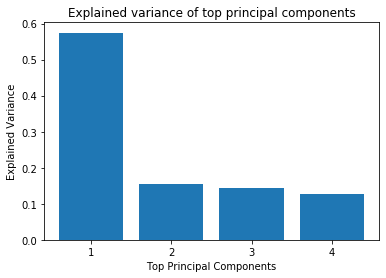

In [17]:
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top principal components')
plt.xlabel('Top Principal Components')
plt.ylabel('Explained Variance')
plt.show()

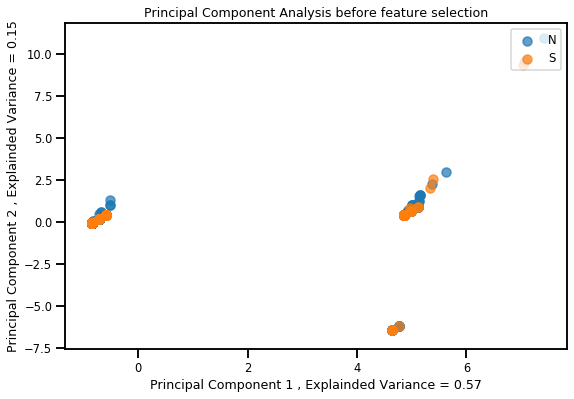

In [18]:
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[(y_train == 0).ravel(),0],xpca.loc[(y_train == 0).ravel(),1], alpha = 0.7, label = 'N')
plt.scatter(xpca.loc[(y_train == 1).ravel(),0],xpca.loc[(y_train == 1).ravel(),1], alpha = 0.7, label = 'S')
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')
plt.show()

In [19]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100], 'gamma':[0.1,1, 10]}
svc = svm.SVC()
clfsvc = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 5)
clfsvc.fit(x_train_scaled, y_train.ravel())


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
print("The best parameters are %s with a score of %0.2f" % (clfsvc.best_params_, clfsvc.best_score_))

The best parameters are {'C': 1, 'gamma': 0.1, 'kernel': 'linear'} with a score of 0.81


In [21]:
y_pred=clfsvc.predict(x_test_scaled) 

In [22]:
print(clfsvc.score(x_test_scaled,y_test.ravel()))

0.7950664136622391


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[419   0]
 [108   0]]


In [24]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [25]:
neigh.fit(x_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
ypredknn = neigh.predict(x_test_scaled)

In [27]:
test_acc = accuracy_score(y_test, ypredknn)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8026565464895635


In [28]:
from sklearn.metrics import confusion_matrix
cmknn = confusion_matrix(y_test, ypredknn)
print(cmknn)

[[394  25]
 [ 79  29]]


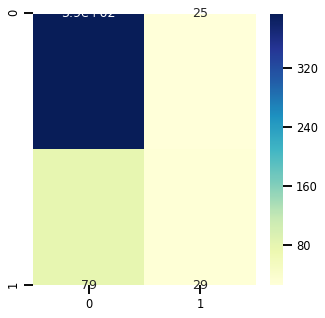

In [29]:
df_cm_knn = pd.DataFrame(cmknn, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm_knn, annot=True, cmap="YlGnBu")
plt.show()

In [30]:
from sklearn.metrics import classification_report
print (classification_report(y_test,ypredknn))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       419
           1       0.54      0.27      0.36       108

    accuracy                           0.80       527
   macro avg       0.69      0.60      0.62       527
weighted avg       0.77      0.80      0.78       527



In [31]:
zona_dummi = pd.get_dummies(Categoria_panificados['ZONA'])
x2 = pd.concat([x, zona_dummi], axis = 1)
x2.head(3)

,CENTRALIZADA,DESCENTRALIZADA,N,S,X,STOCK_CD,IDROTACION,BAHIA BLANCA,C RIVADAVIA,CABA,...,MAR DEL PLATA,MENDOZA,NEUQUEN,PARANA,RAFAELA,ROSARIO,SALTA,SANTA ROSA,TUCUMAN,VIEDMA
0,0,1,1,0,0,9,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,9,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,9,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
cadena_dummi = pd.get_dummies(Categoria_panificados['CADENA'])
x3 = pd.concat([x2, cadena_dummi], axis = 1)
x3.head(3)

,CENTRALIZADA,DESCENTRALIZADA,N,S,X,STOCK_CD,IDROTACION,BAHIA BLANCA,C RIVADAVIA,CABA,...,Cadena 0,Cadena 1,Cadena 10,Cadena 11,Cadena 13,Cadena 2,Cadena 3,Cadena 4,Cadena 5,Cadena 7
0,0,1,1,0,0,9,2,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,9,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,0,0,9,2,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [33]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y, test_size=0.3, random_state=5)
print(x_train3.shape)
print(y_train3.shape)

(1229, 33)
(1229,)


In [34]:
scaler3 = preprocessing.StandardScaler().fit(x_train3)
scaler3

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
x_train_scaled3 = scaler3.transform(x_train3)  
print(x_train_scaled3.mean(axis=0))
print(x_train_scaled3.std(axis=0))

[-3.46888236e-17  6.93776471e-17  6.93776471e-17 -5.78147059e-18
  1.15629412e-17 -1.44536765e-18 -3.26291747e-16  1.73444118e-17
  1.44536765e-17 -4.33610294e-17 -1.44536765e-18  1.44536765e-17
 -2.60166177e-17 -2.31258824e-17 -7.51591177e-17  8.67220589e-18
  2.81846691e-17 -1.15629412e-17 -1.73444118e-17  2.89073530e-18
  1.08402574e-17  4.04702941e-17 -3.39661397e-17  1.04066471e-16
 -2.31258824e-17 -1.15629412e-17 -8.67220589e-18  5.78147059e-18
  1.15629412e-17 -4.26383456e-17 -5.20332353e-17 -1.30083088e-17
  3.90249265e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [36]:
x_test_scaled3 = scaler3.transform(x_test3)  
print(x_test_scaled3.mean(axis=0))
print(x_test_scaled3.std(axis=0))

[-3.63415342e-02  3.63415342e-02  3.63415342e-02  1.13505150e-01
 -7.43488004e-02  2.02603989e-02 -2.89031141e-02  3.54095785e-02
 -7.63858483e-02  7.05148343e-02 -3.68378010e-02  1.36415796e-02
 -5.50946423e-02 -4.10331405e-05 -4.78900114e-02 -1.01981319e-04
 -7.04300713e-02  7.89114296e-02 -6.34514012e-02  2.06578735e-02
  3.60378663e-02 -1.38331392e-02 -8.63961708e-03 -4.33162809e-03
  1.01877644e-02  7.89114296e-02  1.90689609e-02 -5.50684827e-02
  3.69586285e-03 -6.38763278e-02 -2.43288353e-02  2.05138106e-01
  1.49819931e-02]
[0.96211553 0.96211553 0.96211553 1.41266612 0.91333667 1.0371031
 1.03860368 1.05621115 0.7110256  1.04979194 0.95169707 1.00814156
 0.84064877 0.99973044 0.89987045 0.99973848 0.83321748 1.12328081
 0.73113327 1.06050476 1.13573815 0.96720457 0.96636633 0.99500187
 1.0068221  1.12328081 1.07864752 0.96090814 1.00542554 0.87789343
 0.97596006 1.79003744 1.03413812]


In [37]:
iteraciones_knn3 = 50
acc_knn3 = np.zeros(iteraciones_knn3)

In [38]:
for r in range(0,iteraciones_knn3):
    neigh3 = KNeighborsClassifier(n_neighbors=r+1)
    neigh3.fit(x_train_scaled3, y_train3)
    ypredknn3 = neigh3.predict(x_test_scaled3)
    acc_knn3[r] = accuracy_score(y_test3, ypredknn3)

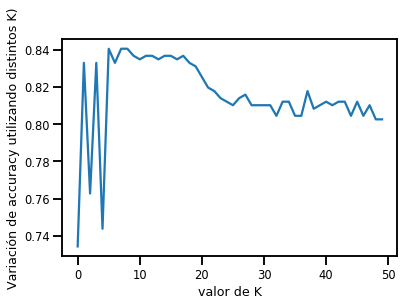

In [39]:
plt.plot(acc_knn3)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
plt.show()

In [40]:
grid_params3={'n_neighbors':[4,5,6,7,8,9]}
neigh3 = GridSearchCV(KNeighborsClassifier(), grid_params3 , refit = True, cv = 5)

In [41]:
neigh3.fit(x_train_scaled3, y_train3)
print("The best parameters are %s with a score of %0.10f" % (neigh3.best_params_, neigh3.best_score_))


The best parameters are {'n_neighbors': 8} with a score of 0.8266883645


In [42]:
ypredknn3= neigh3.predict(x_test_scaled3)

In [43]:
test_acc3 = accuracy_score(y_test3, ypredknn3)
print("El accuracy es " + str(test_acc3))


El accuracy es 0.8406072106261859


In [44]:
from sklearn.metrics import confusion_matrix
cmknn2 = confusion_matrix(y_test3, ypredknn3)
print(cmknn2)

[[408  18]
 [ 66  35]]


In [45]:
from sklearn.metrics import classification_report
print (classification_report(y_test3,ypredknn3))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       426
           1       0.66      0.35      0.45       101

    accuracy                           0.84       527
   macro avg       0.76      0.65      0.68       527
weighted avg       0.82      0.84      0.82       527



In [46]:
grid={'C':[1, 10, 100], "penalty":["l2"]}
logreg=LogisticRegression(random_state=1,solver="newton-cg")
logreg_cv=GridSearchCV(logreg,grid,refit=True,cv=5)
logreg_cv.fit(x_train_scaled3,y_train3)
print("The best parameters are %s with a score of %0.10f" % (logreg_cv.best_params_, logreg_cv.best_score_))

The best parameters are {'C': 1, 'penalty': 'l2'} with a score of 0.8258746949


In [47]:
ypredlogr= logreg_cv.predict(x_test_scaled3)

In [48]:
test_acc_log = accuracy_score(y_test3, ypredlogr)
print("El accuracy es " + str(test_acc_log))

El accuracy es 0.8330170777988615


In [49]:
from sklearn.metrics import confusion_matrix
cmlog = confusion_matrix(y_test3, ypredlogr)
print(cmlog)

[[407  19]
 [ 69  32]]


In [50]:
from sklearn.metrics import classification_report
print (classification_report(y_test3,ypredlogr))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       426
           1       0.63      0.32      0.42       101

    accuracy                           0.83       527
   macro avg       0.74      0.64      0.66       527
weighted avg       0.81      0.83      0.81       527



In [51]:
grid2={'C':[1,2,3,4,7,8,10,11], "penalty":["l2"],}
logreg2=LogisticRegression(random_state=1,class_weight="balanced",solver="newton-cg")
logreg_cv2=GridSearchCV(logreg2,grid2,refit=True,cv=5)
logreg_cv2.fit(x_train_scaled3,y_train3)
print("The best parameters are %s with a score of %0.10f" % (logreg_cv2.best_params_, logreg_cv2.best_score_))

The best parameters are {'C': 2, 'penalty': 'l2'} with a score of 0.6550040683


In [52]:
ypredlogr2= logreg_cv2.predict(x_test_scaled3)

In [53]:
test_acc_log2 = accuracy_score(y_test3, ypredlogr2)
print("El accuracy es " + str(test_acc_log2))

El accuracy es 0.6565464895635673


In [54]:
from sklearn.metrics import confusion_matrix
cmlog2 = confusion_matrix(y_test3, ypredlogr2)
print(cmlog2)

[[254 172]
 [  9  92]]


In [55]:
from sklearn.metrics import classification_report
print (classification_report(y_test3,ypredlogr2))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74       426
           1       0.35      0.91      0.50       101

    accuracy                           0.66       527
   macro avg       0.66      0.75      0.62       527
weighted avg       0.85      0.66      0.69       527



In [57]:
from collections import Counter
from imblearn.combine import SMOTETomek
os_us = SMOTETomek(ratio=0.5)
x_train_res2, y_train_res2 = os_us.fit_sample(x_train_scaled3, y_train3)
 
print ("Distribution before resampling {}".format(Counter(y_train3)))
print ("Distribution after resampling {}".format(Counter(y_train_res2)))

Distribution before resampling Counter({0: 994, 1: 235})
Distribution after resampling Counter({0: 994, 1: 497})


In [58]:
grid_params4={'n_neighbors':[4,5,6,7,8,9]}
neigh4 = GridSearchCV(KNeighborsClassifier(), grid_params4 , refit = True, cv = 5)
neigh4.fit(x_train_res2, y_train_res2)
print("The best parameters are %s with a score of %0.10f" % (neigh4.best_params_, neigh4.best_score_))


The best parameters are {'n_neighbors': 9} with a score of 0.7598926895


In [59]:
ypredknn4= neigh4.predict(x_test_scaled3)

In [60]:
test_acc8 = accuracy_score(y_test3, ypredknn4)
print("El accuracy es " + str(test_acc8))

El accuracy es 0.8140417457305503


In [61]:
from sklearn.metrics import confusion_matrix
cmknn8 = confusion_matrix(y_test3, ypredknn4)
print(cmknn8)

[[379  47]
 [ 51  50]]


In [62]:
from sklearn.metrics import classification_report
print (classification_report(y_test3,ypredknn4))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       426
           1       0.52      0.50      0.51       101

    accuracy                           0.81       527
   macro avg       0.70      0.69      0.70       527
weighted avg       0.81      0.81      0.81       527



In [63]:
grid4={'C':[1, 10, 100], "penalty":["l2"]}
logreg4=LogisticRegression(random_state=1,solver="newton-cg")
logreg_cv4=GridSearchCV(logreg4,grid4,refit=True,cv=5)
logreg_cv4.fit(x_train_res2,y_train_res2)
print("The best parameters are %s with a score of %0.10f" % (logreg_cv4.best_params_, logreg_cv4.best_score_))

The best parameters are {'C': 10, 'penalty': 'l2'} with a score of 0.7545271630


In [64]:
ypredlogr4= logreg_cv4.predict(x_test_scaled3)

In [65]:
test_acc_log4 = accuracy_score(y_test3, ypredlogr4)
print("El accuracy es " + str(test_acc_log4))

El accuracy es 0.8140417457305503


In [66]:
from sklearn.metrics import confusion_matrix
cmlog4 = confusion_matrix(y_test3, ypredlogr4)
print(cmlog4)

[[368  58]
 [ 40  61]]


In [67]:
from sklearn.metrics import classification_report
print (classification_report(y_test3,ypredlogr4))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       426
           1       0.51      0.60      0.55       101

    accuracy                           0.81       527
   macro avg       0.71      0.73      0.72       527
weighted avg       0.83      0.81      0.82       527



In [68]:
#compute and plot AUC
yproba2 = logreg_cv4.predict_proba(x_test_scaled3)
fpr2, tpr2, thresholds = roc_curve(y_test3.astype('int'), yproba2[:,1], drop_intermediate = False)
auc2 = metrics.auc(fpr2, tpr2)
print("El AUC es = " + str(auc2))

El AUC es = 0.8457095709570958


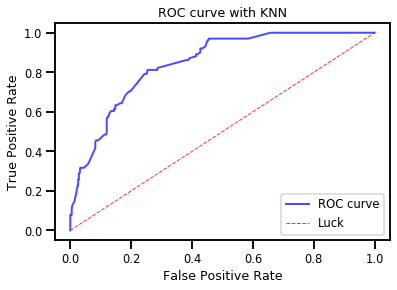

In [69]:
plt.plot(fpr2, tpr2, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()